In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
netflix_data = pd.read_csv("/Users/both/Desktop/Data science project/Netflix_projects/dataset/netflix_titles.csv")
netflix_data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [19]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5332 entries, 7 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5332 non-null   object        
 1   type          5332 non-null   object        
 2   title         5332 non-null   object        
 3   director      5332 non-null   object        
 4   cast          5332 non-null   object        
 5   country       5332 non-null   object        
 6   date_added    5332 non-null   object        
 7   release_year  5332 non-null   int64         
 8   rating        5332 non-null   object        
 9   duration      5332 non-null   object        
 10  listed_in     5332 non-null   object        
 11  description   5332 non-null   object        
 12  date_added_2  5332 non-null   datetime64[ns]
 13  Year          5332 non-null   int64         
 14  Month         5332 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object

In [21]:
netflix_data.count()

show_id         5332
type            5332
title           5332
director        5332
cast            5332
country         5332
date_added      5332
release_year    5332
rating          5332
duration        5332
listed_in       5332
description     5332
date_added_2    5332
Year            5332
Month           5332
dtype: int64

Check na on dataset

In [6]:
sum(netflix_data['date_added'].isna())

10

In [7]:
netflix_data = netflix_data.dropna(axis=0)
sum(netflix_data['date_added'].isna())

0

Plot content on Netflix category by Movie and TV shows

In [8]:
netflix_data['type'].value_counts()

Movie      5185
TV Show     147
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

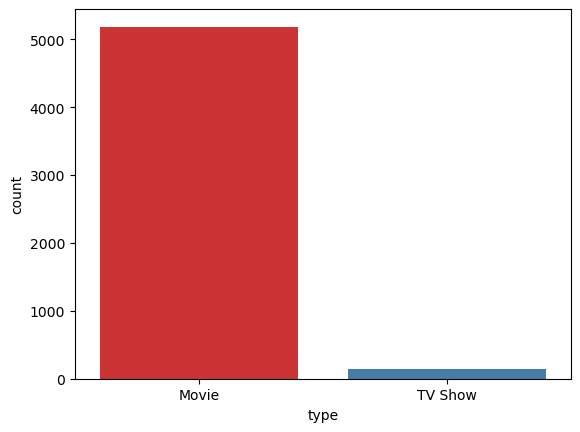

In [9]:
sns.countplot(x= 'type',data=netflix_data,palette="Set1")

Find 10 Top Movie producers on Netflix

In [10]:
netflix_data_country = netflix_data[netflix_data['type']=='Movie']['country'].value_counts().rename_axis('Country').to_frame('counts')
netflix_data_country.reset_index(level=0,inplace=True)
netflix_data_country.head(10)

,Country,counts
0,United States,1819
1,India,868
2,United Kingdom,164
3,Canada,104
4,Egypt,90
5,Nigeria,84
6,Spain,84
7,Indonesia,76
8,Turkey,74
9,Japan,73


<AxesSubplot:xlabel='Country', ylabel='counts'>

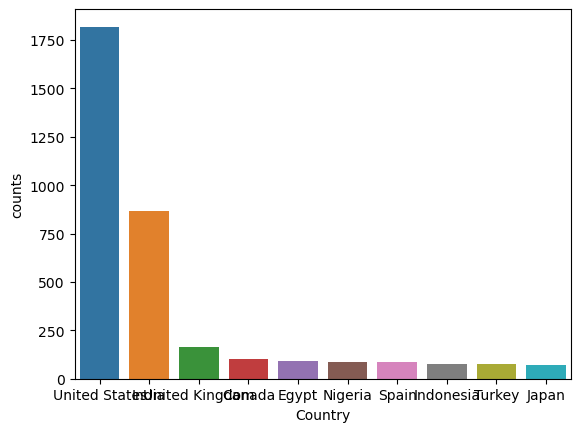

In [11]:
sns.barplot(x="Country",y="counts",data=netflix_data_country[:10])

Find the month and years when the producers released content on Netflix

In [13]:
netflix_data['date_added'].head(5)

7     September 24, 2021
8     September 24, 2021
9     September 24, 2021
12    September 23, 2021
24    September 21, 2021
Name: date_added, dtype: object

In [14]:
#Clean up space at prefix and suffix
#Convert date_added from object to date time 
netflix_data['date_added_2'] = pd.to_datetime(netflix_data['date_added'].str.strip(),format='%B %d, %Y')

In [15]:
netflix_data['Year'] = netflix_data.date_added_2.dt.year
netflix_data['Month'] = netflix_data.date_added_2.dt.month

In [17]:
df = netflix_data.groupby('Year')['Month'].value_counts().unstack().fillna(0).T
df

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Month,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7.0,50.0,90.0,100.0,148.0,91.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,8.0,57.0,52.0,95.0,68.0,58.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,13.0,72.0,128.0,111.0,79.0,63.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,9.0,52.0,78.0,103.0,120.0,107.0
5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0,8.0,52.0,61.0,72.0,101.0,68.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,7.0,58.0,42.0,106.0,106.0,92.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,19.0,46.0,115.0,84.0,95.0,99.0
8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,18.0,64.0,124.0,76.0,73.0,91.0
9,0.0,0.0,0.0,1.0,0.0,1.0,0.0,6.0,14.0,63.0,72.0,81.0,103.0,86.0


Text(0.5, 1.0, 'Netflix Heatmap content update')

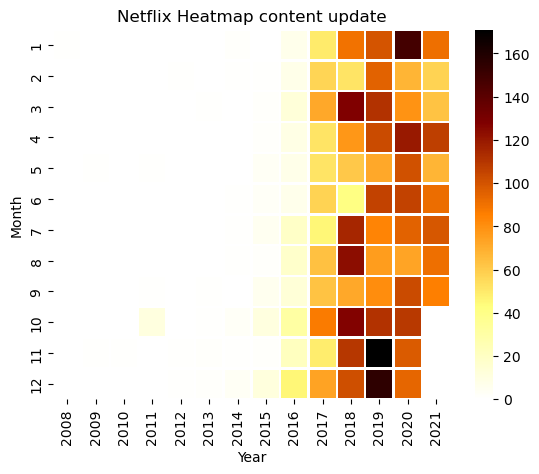

In [50]:
sns.heatmap(df,cmap='afmhot_r',linecolor='white',linewidths=1)
plt.title('Netflix Heatmap content update')


Analysis Movie rating

<AxesSubplot:xlabel='rating', ylabel='count'>

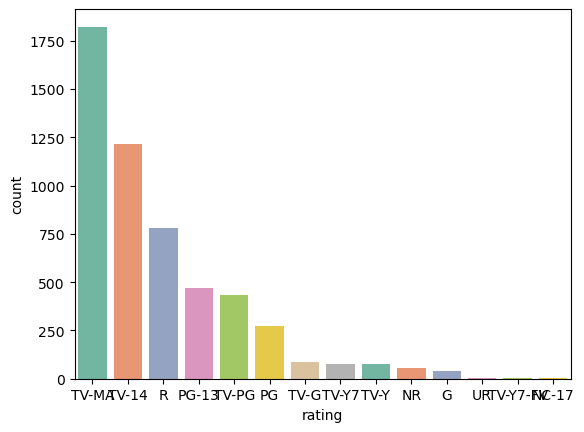

In [22]:
sns.countplot(x="rating", data=netflix_data, palette="Set2", order=netflix_data['rating'].value_counts().index[0:15])

Import IMDB data for further analysis Movie on Netflix

In [42]:
imdb_data = pd.read_csv("/Users/both/Desktop/Data science project/Netflix_projects/dataset/imdb_top_1000.csv", usecols=['Series_Title','IMDB_Rating','Released_Year','Genre','Runtime'])
imdb_data.head(5)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating
0,The Shawshank Redemption,1994,142 min,Drama,9.3
1,The Godfather,1972,175 min,"Crime, Drama",9.2
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0


In [43]:
netflix_movie=imdb_data.merge(netflix_data,left_on='Series_Title',right_on='title',how='inner')
netflix_movie=netflix_movie.sort_values(by='IMDB_Rating', ascending=False)
netflix_movie.head(5)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_2,Year,Month
0,The Lord of the Rings: The Return of the King,2003,201 min,"Action, Adventure, Drama",8.9,s8405,Movie,The Lord of the Rings: The Return of the King,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...","New Zealand, United States","January 1, 2020",2003,PG-13,201 min,"Action & Adventure, Sci-Fi & Fantasy",Aragorn is revealed as the heir to the ancient...,2020-01-01,2020,1
2,Schindler's List,1993,195 min,"Biography, Drama, History",8.9,s7958,Movie,Schindler's List,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,"April 1, 2018",1993,R,195 min,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...,2018-04-01,2018,4
1,Pulp Fiction,1994,154 min,"Crime, Drama",8.9,s7803,Movie,Pulp Fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,"January 1, 2019",1994,R,154 min,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...,2019-01-01,2019,1
3,Inception,2010,148 min,"Action, Adventure, Sci-Fi",8.8,s341,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","United States, United Kingdom","August 1, 2021",2010,PG-13,148 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers",A troubled thief who extracts secrets from peo...,2021-08-01,2021,8
4,The Lord of the Rings: The Two Towers,2002,179 min,"Action, Adventure, Drama",8.7,s8406,Movie,The Lord of the Rings: The Two Towers,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...","New Zealand, United States","January 1, 2020",2002,PG-13,179 min,"Action & Adventure, Sci-Fi & Fantasy",Frodo and Sam head to Mordor to destroy the On...,2020-01-01,2020,1


Analysis the duration of movie on Netflix

In [46]:
netflix_movie['Runtime'] = netflix_movie['Runtime'].str.replace('min','')
netflix_movie['Runtime'] = pd.to_numeric(netflix_movie['Runtime'])
netflix_movie['Runtime'].head(5)

0    201
2    195
1    154
3    148
4    179
Name: Runtime, dtype: int64

Plot density the see the distribution

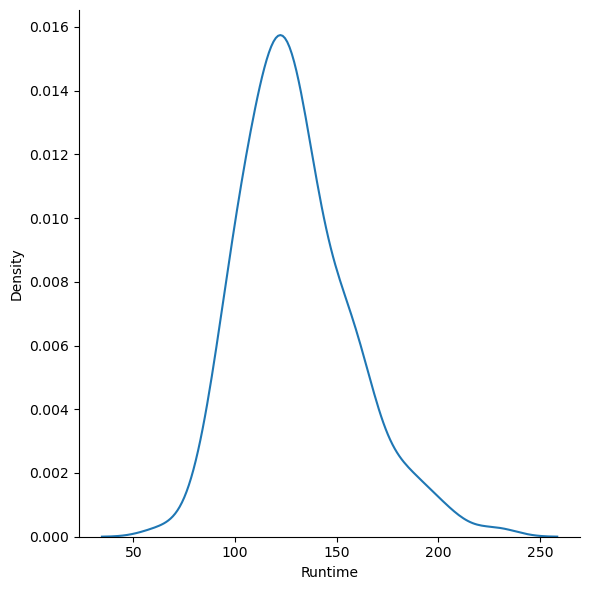

In [55]:
# Plot the distribution of runtime
sns.displot(
    data=netflix_movie,
    x="Runtime", 
    kind="kde", height=6,
    clip=(0, None),
)

<AxesSubplot:xlabel='rating', ylabel='Runtime'>

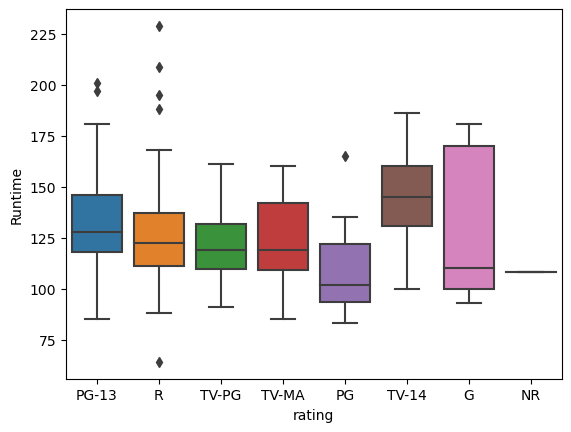

In [65]:
# Draw a nested boxplot to show bills by day and time
sns.boxplot (x = 'rating',y="Runtime",
            data=netflix_movie)
